In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

In [3]:
df = pd.read_csv("words_glasgow.csv")

In [4]:
df['emotion']= (df['valence']+ df['dominance']) / 2
df['visual'] = (df['concreteness']+ df['imageability']) / 2

In [5]:
#droppo colonne

df2 = df.drop(["word","web_corpus_freq"], axis =1)

df2

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,emotion,visual
0,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,3.5985,4.9230
1,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,5.2240,5.6250
2,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,5.2425,3.2315
3,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,4.0930,2.9415
4,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,4.3400,2.9315
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,8,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,0,5.1665,6.2355
4678,4,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,0,4.3745,3.2955
4679,4,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,0,6.4695,4.2355
4680,3,5.909,6.235,5.485,6.118,6.441,5.655,2.324,4.844,4.059,0,5.8600,6.2795


In [166]:
#Leviamo Outliers
def clean(i, x) :
    Q1 = x[i].quantile(0.25, interpolation='linear')
    Q3 = x[i].quantile(0.75, interpolation='linear')
    IQR = Q3-Q1
    Lowerfence = Q1 - 1.5*IQR
    Upperfence = Q3 + 1.5*IQR
    NOR= x.loc[(x[i] > Lowerfence) & (x[i] < Upperfence) ]
    return NOR

In [197]:
df2 = clean("gender", df2)
df2 = clean("emotion", df2)
df2 = clean("visual", df2)
df2 = clean("aoa", df2)

## SENZA OUTLIERS

In [30]:
train_data1 = df2[["emotion","visual","aoa","gender","polysemy"]].values

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(train_data1)

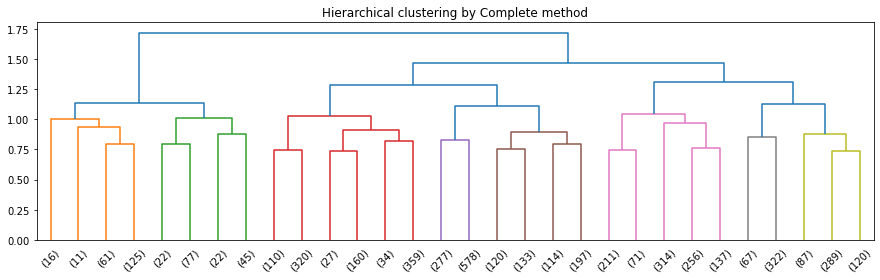

In [32]:
# Hierarchical completo (NO OUTLIERS)

plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.1, truncate_mode='lastp')

plt.title("Hierarchical clustering by Complete method")
plt.savefig("complete.jpg")

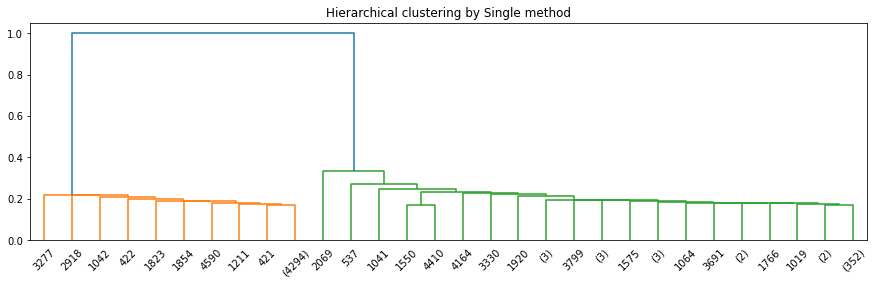

In [33]:
# Hierarchical singolo (NO OUTLIERS)

plt.figure(figsize=(15, 4))

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

plt.title("Hierarchical clustering by Single method")
plt.savefig("single.jpg")

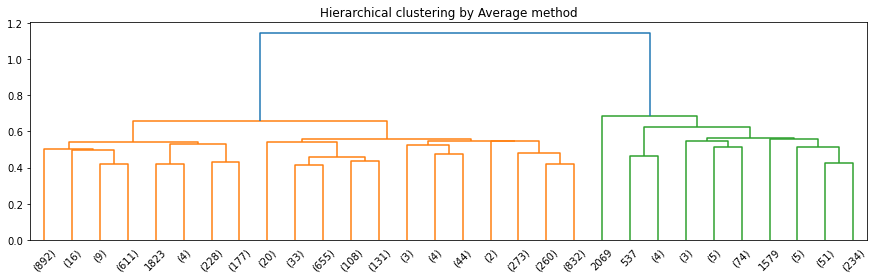

In [47]:
# Hierarchical avg (NO OUTLIERS)

plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.7, truncate_mode='lastp')

plt.title("Hierarchical clustering by Average method")
plt.savefig("average.jpg")

In [44]:
hier_complete = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
hier_complete.fit(X)

hier_single = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
hier_single.fit(X)

hier_avg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
hier_avg.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [45]:
#Siluette

print("Siluette Complete:","\t",silhouette_score(X, hier_complete.labels_))
print("Siluette Single:","\t",silhouette_score(X, hier_single.labels_))
print("Siluette Average:","\t",silhouette_score(X, hier_avg.labels_))

Siluette Complete: 	 0.21634918751071874
Siluette Single: 	 0.46852463106623826
Siluette Average: 	 0.2672363700171312


In [46]:
# Cluster e Conteggio valori in cluster

print(np.unique(hier_complete.labels_, return_counts=True))
print(np.unique(hier_single.labels_, return_counts=True))
print(np.unique(hier_avg.labels_, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int64), array([ 379, 1419,  885,  989, 1010], dtype=int64))
(array([0, 1, 2, 3, 4], dtype=int64), array([ 376, 4303,    1,    1,    1], dtype=int64))
(array([0, 1, 2, 3, 4], dtype=int64), array([ 373, 2365,    1, 1938,    5], dtype=int64))
